In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

In [2]:
df=pd.read_csv('/content/final.csv',encoding='latin-1')

In [3]:
df.head(5)

,r-no,order_no,order_date,ship_date,ship_mode,customer_id,city,state,country,product_id,sales,quantity,profit,shipping_cost,order_priority,customer_name,customer_segment,product_name,product_category,product_subcategory
0,23227,ID-2013-32252,2/10/2013,7/10/2013,Standard Class,C-1023,Singapore,Singapore,Singapore,OFF-ST-10004183,1499.391677,2,49.8000,12.090,Medium,Alex Russell,Corporate,"Rogers Trays, Wire Frame",Office Supplies,Storage
1,26413,IN-2014-61204,9/12/2014,15/12/2014,Standard Class,C-1438,Bogor,Jawa Barat,Indonesia,TEC-PH-10004682,146.959800,2,8.8398,12.090,Medium,Kelly Williams,Consumer,"Cisco Headset, VoIP",Technology,Phones
2,44386,CM-2013-5120,3/7/2013,8/7/2013,Standard Class,C-1153,Garoua,Nord,Cameroon,TEC-NOK-10001172,123.240000,1,3.6900,12.090,Medium,Christina VanderZanden,Consumer,"Nokia Speaker Phone, VoIP",Technology,Phones
3,8492,MX-2014-108966,19/10/2014,23/10/2014,Standard Class,C-1141,Soacha,Cundinamarca,Colombia,FUR-FU-10003297,217.020000,3,19.5000,12.084,Medium,Chad McGuire,Consumer,"Rubbermaid Frame, Erganomic",Furniture,Furnishings
4,7113,MX-2011-146479,10/8/2011,12/8/2011,Second Class,C-1356,Tlalpan,Distrito Federal,Mexico,OFF-ST-10002343,193.920000,6,85.3200,12.082,Medium,Jasper Cacioppo,Consumer,"Smead Trays, Blue",Office Supplies,Storage


In [4]:
df.shape

(51290, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   r-no                 51290 non-null  int64  
 1   order_no             51290 non-null  object 
 2   order_date           51290 non-null  object 
 3   ship_date            51290 non-null  object 
 4   ship_mode            51290 non-null  object 
 5   customer_id          51290 non-null  object 
 6   city                 51290 non-null  object 
 7   state                51290 non-null  object 
 8   country              51290 non-null  object 
 9   product_id           51290 non-null  object 
 10  sales                51290 non-null  float64
 11  quantity             51290 non-null  int64  
 12  profit               51290 non-null  float64
 13  shipping_cost        51290 non-null  float64
 14  order_priority       51290 non-null  object 
 15  customer_name        51290 non-null 

In [6]:
df['order_date']=pd.to_datetime(df['order_date'],format='%d/%m/%Y')

In [7]:
df['ship_date']=pd.to_datetime(df['ship_date'],format='%d/%m/%Y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   r-no                 51290 non-null  int64         
 1   order_no             51290 non-null  object        
 2   order_date           51290 non-null  datetime64[ns]
 3   ship_date            51290 non-null  datetime64[ns]
 4   ship_mode            51290 non-null  object        
 5   customer_id          51290 non-null  object        
 6   city                 51290 non-null  object        
 7   state                51290 non-null  object        
 8   country              51290 non-null  object        
 9   product_id           51290 non-null  object        
 10  sales                51290 non-null  float64       
 11  quantity             51290 non-null  int64         
 12  profit               51290 non-null  float64       
 13  shipping_cost        51290 non-

In [9]:
df.isna().sum()

,0
r-no,0
order_no,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
city,0
state,0
country,0
product_id,0


In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(columns=['r-no','order_no','customer_id','product_id',],inplace=True)

Unit Price Calculation

In [12]:
df['total_price']=df['sales']*df['quantity']
df

,order_date,ship_date,ship_mode,city,state,country,sales,quantity,profit,shipping_cost,order_priority,customer_name,customer_segment,product_name,product_category,product_subcategory,total_price
0,2013-10-02,2013-10-07,Standard Class,Singapore,Singapore,Singapore,1499.391677,2,49.8000,12.090,Medium,Alex Russell,Corporate,"Rogers Trays, Wire Frame",Office Supplies,Storage,2998.783354
1,2014-12-09,2014-12-15,Standard Class,Bogor,Jawa Barat,Indonesia,146.959800,2,8.8398,12.090,Medium,Kelly Williams,Consumer,"Cisco Headset, VoIP",Technology,Phones,293.919600
2,2013-07-03,2013-07-08,Standard Class,Garoua,Nord,Cameroon,123.240000,1,3.6900,12.090,Medium,Christina VanderZanden,Consumer,"Nokia Speaker Phone, VoIP",Technology,Phones,123.240000
3,2014-10-19,2014-10-23,Standard Class,Soacha,Cundinamarca,Colombia,217.020000,3,19.5000,12.084,Medium,Chad McGuire,Consumer,"Rubbermaid Frame, Erganomic",Furniture,Furnishings,651.060000
4,2011-08-10,2011-08-12,Second Class,Tlalpan,Distrito Federal,Mexico,193.920000,6,85.3200,12.082,Medium,Jasper Cacioppo,Consumer,"Smead Trays, Blue",Office Supplies,Storage,1163.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2012-12-01,2012-12-06,Standard Class,Papakura,Auckland,New Zealand,513.108000,6,-85.5720,42.390,Medium,Victor Preis,Home Office,"Brother Personal Copier, Digital",Technology,Copiers,3078.648000
51286,2012-07-17,2012-07-20,First Class,Buenos Aires,Buenos Aires,Argentina,199.368000,3,-129.6120,42.389,High,Greg Maxwell,Corporate,"Sauder 3-Shelf Cabinet, Metal",Furniture,Bookcases,598.104000
51287,2011-10-10,2011-10-15,Standard Class,Huntsville,Texas,United States,719.952000,6,71.9952,42.380,Medium,Craig Molinari,Corporate,Motorola Droid Maxx,Technology,Phones,4319.712000
51288,2014-08-26,2014-08-30,Standard Class,Mainz,Rhineland-Palatinate,Germany,513.360000,4,66.7200,42.370,High,Tamara Chand,Corporate,"HP Ink, Digital",Technology,Copiers,2053.440000


Days to Initiate Shipping

In [13]:
df['processing_shipping_days']=df.apply(lambda x:(x['ship_date']-x['order_date']).days,axis=1)

Categorising the orders based on profit

In [14]:
def find_profit_category(profit):
  if profit >= 0 and profit <= 100:
    return 'Low'
  elif profit > 100 and profit <= 500:
    return 'Medium'
  elif profit > 500 and profit <= 1000:
    return 'High'
  elif profit > 1000:
    return 'Very High'
  else:
    return 'Loss'

In [15]:
df['profit_category']=df['profit'].apply(find_profit_category)

In [16]:
df

,order_date,ship_date,ship_mode,city,state,country,sales,quantity,profit,shipping_cost,order_priority,customer_name,customer_segment,product_name,product_category,product_subcategory,total_price,processing_shipping_days,profit_category
0,2013-10-02,2013-10-07,Standard Class,Singapore,Singapore,Singapore,1499.391677,2,49.8000,12.090,Medium,Alex Russell,Corporate,"Rogers Trays, Wire Frame",Office Supplies,Storage,2998.783354,5,Low
1,2014-12-09,2014-12-15,Standard Class,Bogor,Jawa Barat,Indonesia,146.959800,2,8.8398,12.090,Medium,Kelly Williams,Consumer,"Cisco Headset, VoIP",Technology,Phones,293.919600,6,Low
2,2013-07-03,2013-07-08,Standard Class,Garoua,Nord,Cameroon,123.240000,1,3.6900,12.090,Medium,Christina VanderZanden,Consumer,"Nokia Speaker Phone, VoIP",Technology,Phones,123.240000,5,Low
3,2014-10-19,2014-10-23,Standard Class,Soacha,Cundinamarca,Colombia,217.020000,3,19.5000,12.084,Medium,Chad McGuire,Consumer,"Rubbermaid Frame, Erganomic",Furniture,Furnishings,651.060000,4,Low
4,2011-08-10,2011-08-12,Second Class,Tlalpan,Distrito Federal,Mexico,193.920000,6,85.3200,12.082,Medium,Jasper Cacioppo,Consumer,"Smead Trays, Blue",Office Supplies,Storage,1163.520000,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2012-12-01,2012-12-06,Standard Class,Papakura,Auckland,New Zealand,513.108000,6,-85.5720,42.390,Medium,Victor Preis,Home Office,"Brother Personal Copier, Digital",Technology,Copiers,3078.648000,5,Loss
51286,2012-07-17,2012-07-20,First Class,Buenos Aires,Buenos Aires,Argentina,199.368000,3,-129.6120,42.389,High,Greg Maxwell,Corporate,"Sauder 3-Shelf Cabinet, Metal",Furniture,Bookcases,598.104000,3,Loss
51287,2011-10-10,2011-10-15,Standard Class,Huntsville,Texas,United States,719.952000,6,71.9952,42.380,Medium,Craig Molinari,Corporate,Motorola Droid Maxx,Technology,Phones,4319.712000,5,Low
51288,2014-08-26,2014-08-30,Standard Class,Mainz,Rhineland-Palatinate,Germany,513.360000,4,66.7200,42.370,High,Tamara Chand,Corporate,"HP Ink, Digital",Technology,Copiers,2053.440000,4,Low


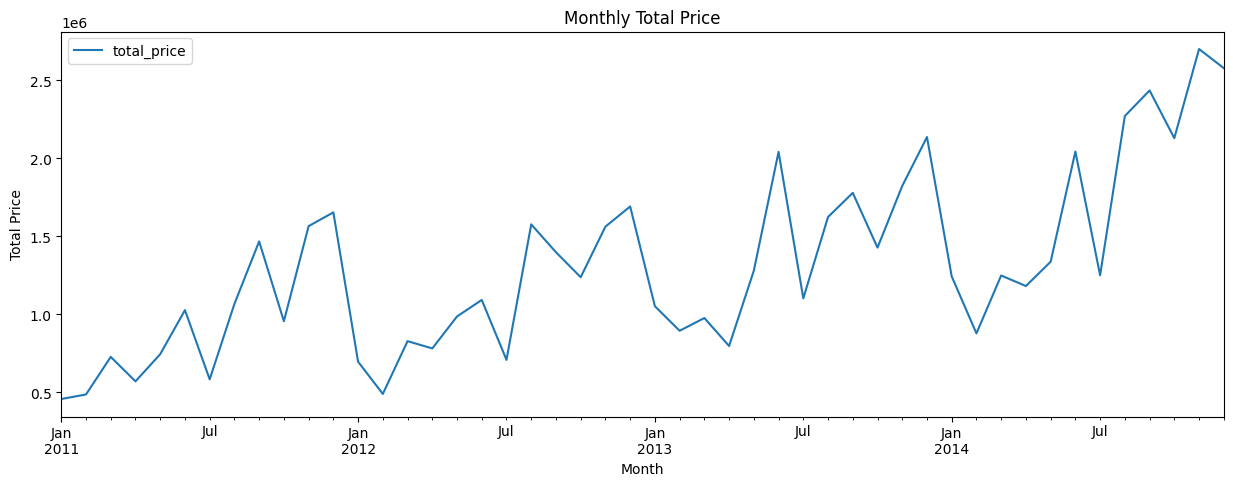

In [17]:
monthly_total_price=df.groupby(pd.PeriodIndex(df['order_date'],freq='M')).agg({'total_price':'sum'})
monthly_total_price.plot(figsize=(15,5))
plt.title('Monthly Total Price')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

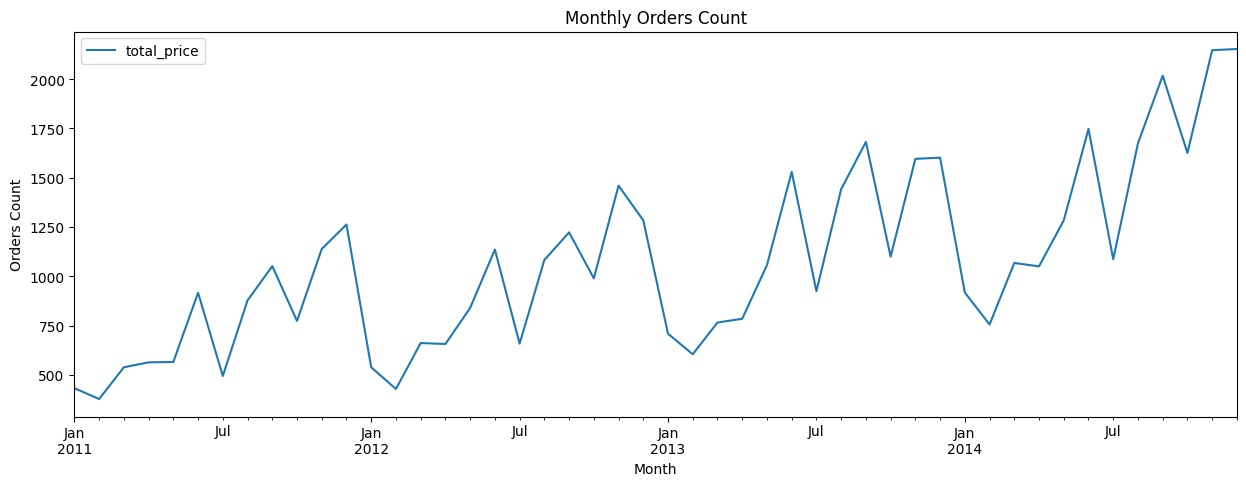

In [18]:
monthly_orders_count=df.groupby(pd.PeriodIndex(df['order_date'],freq='M')).agg({'total_price':'count'})
monthly_orders_count.plot(figsize=(15,5))
plt.title('Monthly Orders Count')
plt.xlabel('Month')
plt.ylabel('Orders Count')
plt.show()

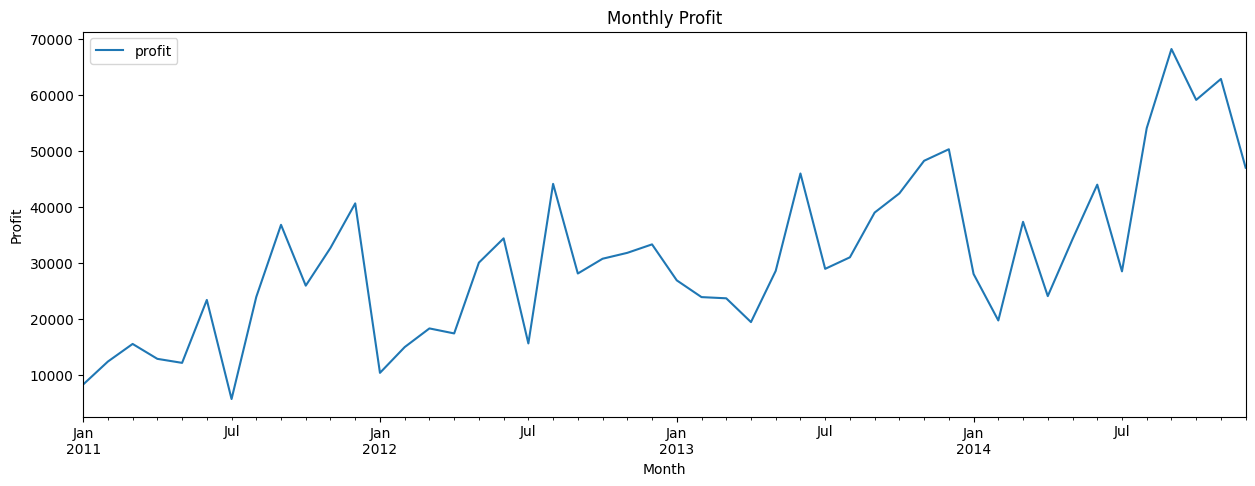

In [19]:
monthly_profit=df.groupby(pd.PeriodIndex(df['order_date'],freq='M')).agg({'profit':'sum'})
monthly_profit.plot(figsize=(15,5))
plt.title('Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

In [20]:
totalprice_by_shipmode=df.groupby('ship_mode').agg({'total_price':['sum','count'],'profit':'sum'}).round().sort_values(by=('total_price','sum'),ascending=False)

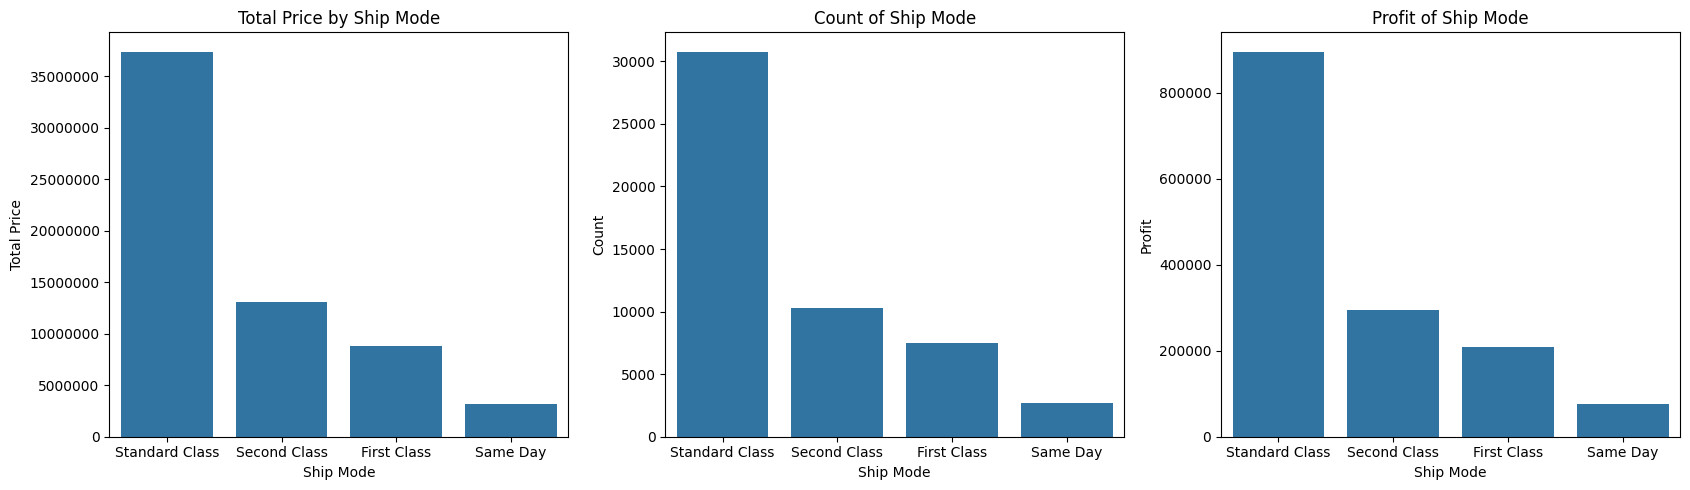

In [21]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x=totalprice_by_shipmode.index,y=totalprice_by_shipmode['total_price']['sum'].values,ax=ax[0])
ax[0].ticklabel_format(style='plain',axis='y')
ax[0].set_title('Total Price by Ship Mode')
ax[0].set_xlabel('Ship Mode')
ax[0].set_ylabel('Total Price')


sns.barplot(x=totalprice_by_shipmode.index,y=totalprice_by_shipmode['total_price']['count'].values,ax=ax[1])
ax[1].set_title('Count of Ship Mode')
ax[1].set_xlabel('Ship Mode')
ax[1].set_ylabel('Count')
plt.tight_layout()

sns.barplot(x=totalprice_by_shipmode.index,y=totalprice_by_shipmode['profit']['sum'].values,ax=ax[2])
ax[2].set_title('Profit of Ship Mode')
ax[2].set_xlabel('Ship Mode')
ax[2].set_ylabel('Profit')
plt.tight_layout()
plt.show()

Insights From Visualization: The Standard Class ship mode is more in terms of total price,number of orders and profit for the company ,then followed by second class ship mode then only first class ship mode.

In [22]:
high_totalprice_countrywise=df.groupby('country').agg({'total_price':['sum','count']}).round().sort_values(by=[('total_price','sum'),('total_price','count')],ascending=[False,True])

In [23]:
totalpricewise_country_rank = [f'{rank+1}:{city}' for rank, city in enumerate(high_totalprice_countrywise.index)]

In [24]:
totalpricewise_country_rank[:10]


['1:United States',
 '2:Australia',
 '3:France',
 '4:China',
 '5:Mexico',
 '6:Germany',
 '7:India',
 '8:United Kingdom',
 '9:Indonesia',
 '10:Brazil']

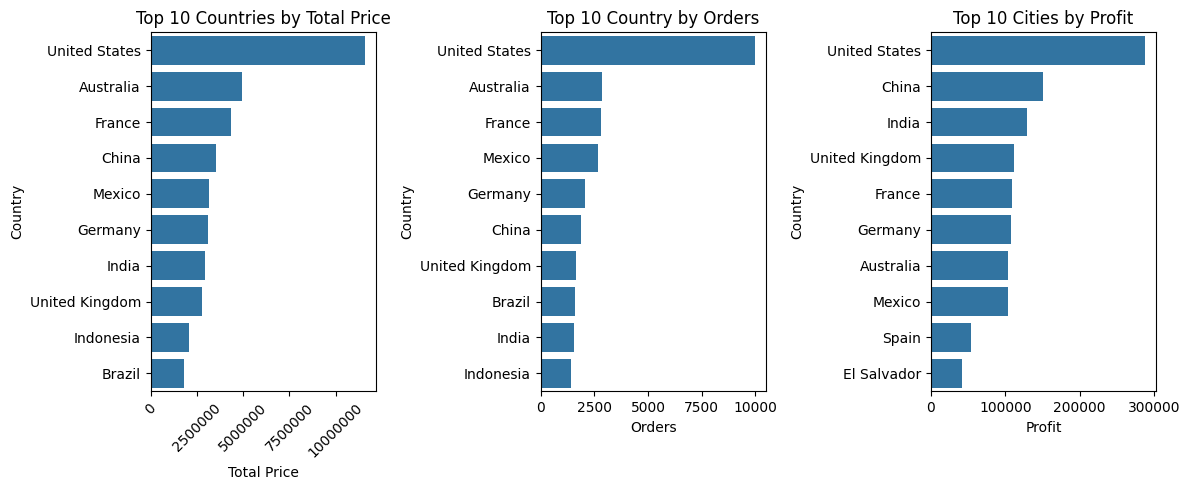

In [25]:
c1=high_totalprice_countrywise.head(10)


fig,ax=plt.subplots(1,3,figsize=(12,5))
sns.barplot(y=c1.index,x=c1[('total_price','sum')].values,ax=ax[0])
ax[0].set_title('Top 10 Countries by Total Price')
ax[0].set_xlabel('Total Price')
ax[0].set_ylabel('Country')
ax[0].ticklabel_format(style='plain',axis='x')
ax[0].tick_params(axis='x', rotation=45)

countrywise_orders=df['country'].value_counts()
c2=countrywise_orders.head(10)
sns.barplot(y=c2.index,x=c2.values,ax=ax[1])
ax[1].set_title('Top 10 Country by Orders')
ax[1].set_xlabel('Orders')
ax[1].set_ylabel('Country')


high_profit_countrywise=df.groupby('country').agg({'profit':'sum'}).sort_values(by='profit',ascending=False)
c3=high_profit_countrywise.head(10)
sns.barplot(y=c3.index,x=c3['profit'].values,ax=ax[2])
ax[2].set_title('Top 10 Cities by Profit')
ax[2].set_xlabel('Profit')
ax[2].set_ylabel('Country')
plt.tight_layout()
plt.show()

Insights From Visualization:.

*   United states is the highest contributor to the company in terms of total price,number of orders and also profit
*   But suprisingly as australia having the highest total price and number of orders but in terms of profit it is in 7th place.



In [26]:
top_country=df[df['country']==high_profit_countrywise.index[0]]

In [27]:
toptotalprice_topcountry=top_country.groupby('state').agg({'total_price':'sum'}).sort_values(by='total_price',ascending=False)


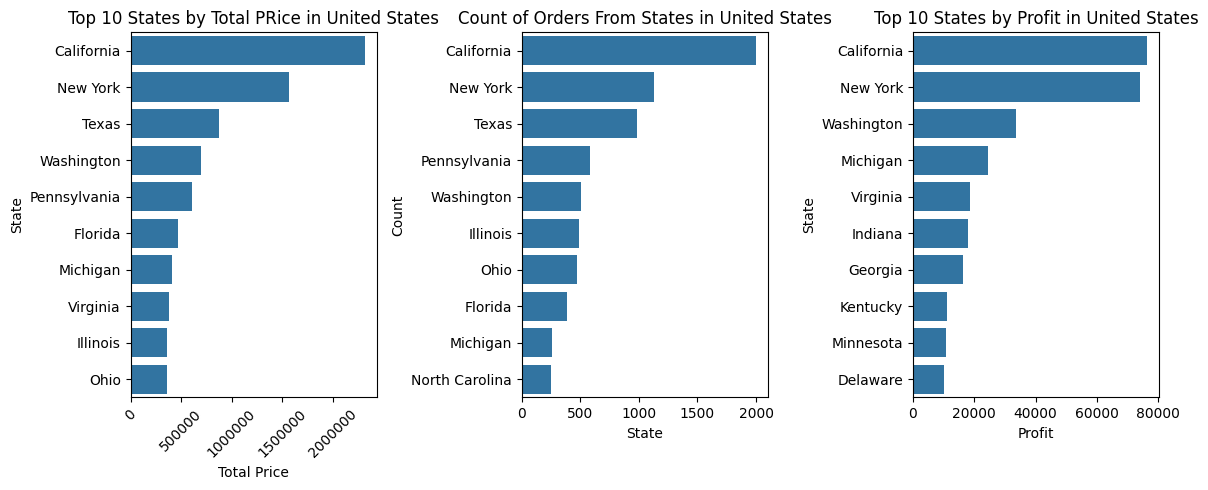

In [28]:
c4=toptotalprice_topcountry.head(10)
fig,ax = plt.subplots(1,3,figsize=(12,5))
sns.barplot(y=c4.index,x=c4['total_price'].values,ax=ax[0])
ax[0].set_title(f'Top 10 States by Total PRice in {high_profit_countrywise.index[0]}')
ax[0].set_xlabel('Total Price')
ax[0].set_ylabel('State')
ax[0].ticklabel_format(style='plain',axis='x')
ax[0].tick_params(axis='x', rotation=45)

c5=top_country['state'].value_counts().head(10)
sns.barplot(y=c5.index,x=c5.values,ax=ax[1])
ax[1].set_title(f'Count of Orders From States in {high_profit_countrywise.index[0]}')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Count')

c6=top_country.groupby('state').agg({'profit':'sum'}).sort_values(by='profit',ascending=False).head(10)
sns.barplot(y=c6.index,x=c6['profit'].values,ax=ax[2])
ax[2].set_title(f'Top 10 States by Profit in {high_profit_countrywise.index[0]}')
ax[2].set_xlabel('Profit')
ax[2].set_ylabel('State')
plt.tight_layout()
plt.show()

Insights From Visaulization:California is the the top most state in terms of profit,number of orders and total sales followed by new york.

In [29]:
topstate=df[df['state']==toptotalprice_topcountry.index[0]]
top_totalprice_city=topstate.groupby('city').agg({'total_price':'sum'}).sort_values(by='total_price',ascending=False)

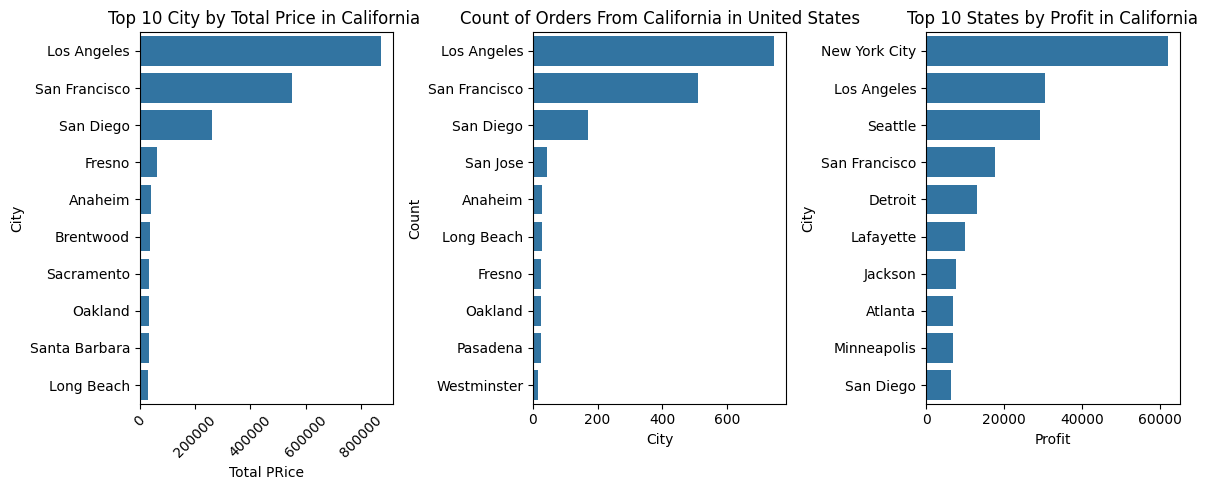

In [30]:
c7=top_totalprice_city.head(10)
fig,ax = plt.subplots(1,3,figsize=(12,5))
sns.barplot(y=c7.index,x=c7['total_price'].values,ax=ax[0])
ax[0].set_title(f'Top 10 City by Total Price in {toptotalprice_topcountry.index[0]} ')
ax[0].set_xlabel('Total PRice')
ax[0].set_ylabel('City')
ax[0].ticklabel_format(style='plain',axis='x')
ax[0].tick_params(axis='x', rotation=45)

c8=topstate['city'].value_counts().head(10)
sns.barplot(y=c8.index,x=c8.values,ax=ax[1])
ax[1].set_title(f'Count of Orders From {toptotalprice_topcountry.index[0]} in {high_profit_countrywise.index[0]}')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Count')

c9=top_country.groupby('city').agg({'profit':'sum'}).sort_values(by='profit',ascending=False).head(10)
sns.barplot(y=c9.index,x=c9['profit'].values,ax=ax[2])
ax[2].set_title(f'Top 10 States by Profit in {toptotalprice_topcountry.index[0]}')
ax[2].set_xlabel('Profit')
ax[2].set_ylabel('City')
plt.tight_layout()
plt.show()

Insights From Visaulization:Los Angeles is the the top most city  in terms of number of orders and total sales but suprisingly more profit is from new york and second most profitable city is los angeles.

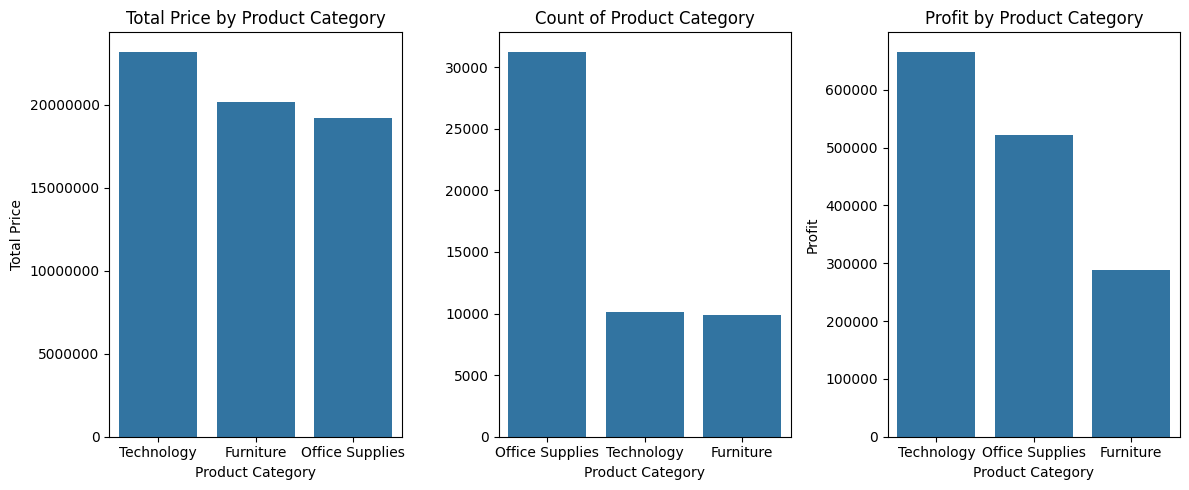

In [31]:
p1=df.groupby('product_category').agg({'total_price':'sum'}).sort_values('total_price',ascending=False)
p2=df['product_category'].value_counts()
p3=df.groupby('product_category').agg({'profit':'sum'}).sort_values('profit',ascending=False)

fig,ax=plt.subplots(1,3,figsize=(12,5))
sns.barplot(x=p1.index,y=p1['total_price'].values,ax=ax[0])
ax[0].set_title('Total Price by Product Category')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Total Price')
ax[0].ticklabel_format(style='plain',axis='y')

sns.barplot(x=p2.index,y=p2.values,ax=ax[1])
ax[1].set_title('Count of Product Category')
ax[1].set_xlabel('Product Category')

sns.barplot(x=p3.index,y=p3['profit'].values,ax=ax[2])
ax[2].set_title('Profit by Product Category')
ax[2].set_xlabel('Product Category')
ax[2].set_ylabel('Profit')
plt.tight_layout()
plt.show()



Insights From Visaulization:In Los Angeles the most profitable product category is technology and the total sales of the technology product is also more but most order is from the office supplies.

In [32]:
top_category=df[df['product_category']==p3.index[0]]

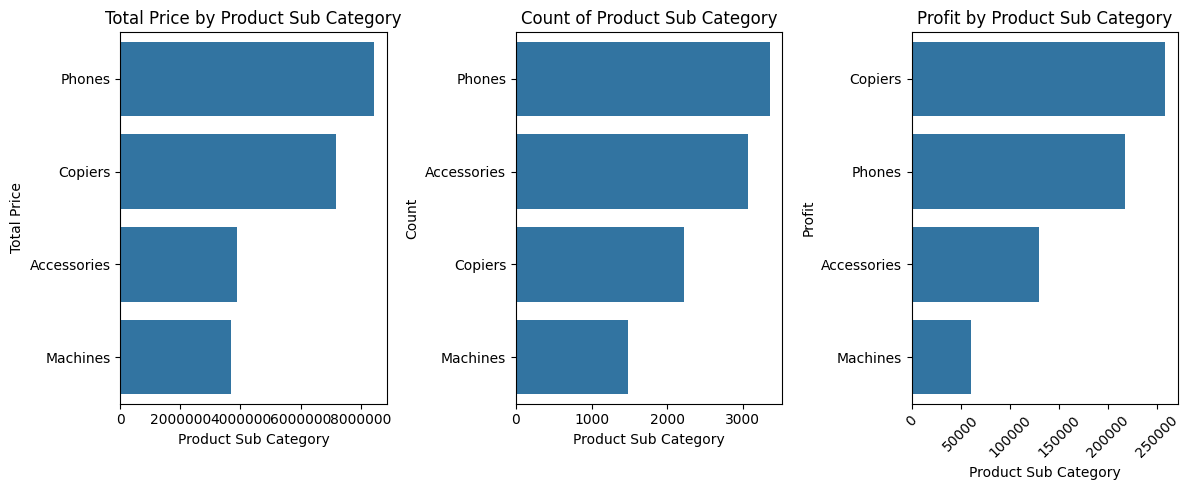

In [33]:
p4=top_category.groupby('product_subcategory').agg({'total_price':'sum'}).sort_values('total_price',ascending=False)
p5=top_category['product_subcategory'].value_counts()
p6=top_category.groupby('product_subcategory').agg({'profit':'sum'}).sort_values('profit',ascending=False)

fig,ax=plt.subplots(1,3,figsize=(12,5))
sns.barplot(y=p4.index,x=p4['total_price'].values,ax=ax[0])
ax[0].set_title('Total Price by Product Sub Category')
ax[0].set_xlabel('Product Sub Category')
ax[0].set_ylabel('Total Price')
ax[0].ticklabel_format(style='plain',axis='x')

sns.barplot(y=p5.index,x=p5.values,ax=ax[1])
ax[1].set_title('Count of Product Sub Category')
ax[1].set_xlabel('Product Sub Category')
ax[1].set_ylabel('Count')

sns.barplot(y=p6.index,x=p6['profit'].values,ax=ax[2])
ax[2].set_title('Profit by Product Sub Category')
ax[2].set_xlabel('Product Sub Category')
ax[2].set_ylabel('Profit')
ax[2].tick_params(axis='x',rotation=45)
plt.tight_layout()
plt.show()

Insights From Visaulization:In Los Angeles the most profitable product sub category is copiers but the total sales of the phones is more when compared copiers and the number of order is from phones.

In [34]:
top_profit_subcategory=df[df['product_subcategory']==p6.index[0]]
top_profit_subcategory_rank= top_profit_subcategory.groupby('product_name').agg({'total_price':'sum','profit':'sum'}).sort_values('total_price',ascending=False)
top_profit_subcategory_rank_list=[f'{rank+1}:{product}' for rank,product in enumerate(top_profit_subcategory_rank.index)]
top_profit_subcategory_rank_list[:10]

['1:Canon imageCLASS 2200 Advanced Copier',
 '2:Canon Fax Machine, High-Speed',
 '3:Canon Wireless Fax, Laser',
 '4:Canon Wireless Fax, Color',
 '5:Hewlett Copy Machine, Color',
 '6:Hewlett Wireless Fax, Laser',
 '7:Brother Fax Machine, Laser',
 '8:Hewlett Wireless Fax, High-Speed',
 '9:Brother Fax Machine, High-Speed',
 '10:Sharp Wireless Fax, Digital']

In [35]:
top_profit_customer=df.groupby('customer_name').agg({'profit':'sum'}).sort_values('profit',ascending=False)
top_profit_customer_rank=[f'{rank+1}:{customer}' for rank,customer in enumerate(top_profit_customer.index)]
top_profit_customer_rank[:10]

['1:Tamara Chand',
 '2:Raymond Buch',
 '3:Sanjit Chand',
 '4:Hunter Lopez',
 '5:Bill Eplett',
 '6:Harry Marie',
 '7:Nora Pelletier',
 '8:Susan Pistek',
 '9:Mike Gockenbach',
 '10:Adrian Barton']

In [36]:
df['profit_category'].value_counts()

,count
profit_category,
Low,33003
Loss,12515
Medium,5095
High,530
Very High,147


In [37]:
a=df['profit'].sum()
a

1475961.17638

In [38]:
b=df[df['profit']>-1000]['profit'].sum()

In [39]:
(b-a)/a*100

8.975980237158428

In [40]:
country_shipping_days=df.groupby('country',as_index=False).agg({'processing_shipping_days':'mean'}).sort_values('processing_shipping_days',ascending=False)
country_shipping_days

,country,processing_shipping_days
118,South Sudan,5.500000
5,Armenia,5.333333
75,Macedonia,5.250000
64,Jamaica,5.032258
127,Tajikistan,5.000000
...,...,...
122,Swaziland,2.500000
41,Estonia,2.461538
52,Guinea-Bissau,2.444444
24,Chad,2.000000


In [41]:
morethan4_5days_country=country_shipping_days[country_shipping_days['processing_shipping_days']>4]['country']
morethan4_5days_country

,country
118,South Sudan
5,Armenia
75,Macedonia
64,Jamaica
127,Tajikistan
...,...
37,Egypt
21,Cameroon
136,Ukraine
63,Italy


In [42]:
new_df=df.copy()

In [43]:
new_df1=[]
for i in new_df.values:
  if i[5] in morethan4_5days_country.values:
    g=i[17]-1
    new_df1.append(g)
  else:
    g=i[17]
    new_df1.append(g)

In [44]:
a=np.mean(new_df1)

In [45]:
b=df['processing_shipping_days'].mean()

In [46]:
(b-a)/b*100

6.855969625077973

In [47]:
df

,order_date,ship_date,ship_mode,city,state,country,sales,quantity,profit,shipping_cost,order_priority,customer_name,customer_segment,product_name,product_category,product_subcategory,total_price,processing_shipping_days,profit_category
0,2013-10-02,2013-10-07,Standard Class,Singapore,Singapore,Singapore,1499.391677,2,49.8000,12.090,Medium,Alex Russell,Corporate,"Rogers Trays, Wire Frame",Office Supplies,Storage,2998.783354,5,Low
1,2014-12-09,2014-12-15,Standard Class,Bogor,Jawa Barat,Indonesia,146.959800,2,8.8398,12.090,Medium,Kelly Williams,Consumer,"Cisco Headset, VoIP",Technology,Phones,293.919600,6,Low
2,2013-07-03,2013-07-08,Standard Class,Garoua,Nord,Cameroon,123.240000,1,3.6900,12.090,Medium,Christina VanderZanden,Consumer,"Nokia Speaker Phone, VoIP",Technology,Phones,123.240000,5,Low
3,2014-10-19,2014-10-23,Standard Class,Soacha,Cundinamarca,Colombia,217.020000,3,19.5000,12.084,Medium,Chad McGuire,Consumer,"Rubbermaid Frame, Erganomic",Furniture,Furnishings,651.060000,4,Low
4,2011-08-10,2011-08-12,Second Class,Tlalpan,Distrito Federal,Mexico,193.920000,6,85.3200,12.082,Medium,Jasper Cacioppo,Consumer,"Smead Trays, Blue",Office Supplies,Storage,1163.520000,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2012-12-01,2012-12-06,Standard Class,Papakura,Auckland,New Zealand,513.108000,6,-85.5720,42.390,Medium,Victor Preis,Home Office,"Brother Personal Copier, Digital",Technology,Copiers,3078.648000,5,Loss
51286,2012-07-17,2012-07-20,First Class,Buenos Aires,Buenos Aires,Argentina,199.368000,3,-129.6120,42.389,High,Greg Maxwell,Corporate,"Sauder 3-Shelf Cabinet, Metal",Furniture,Bookcases,598.104000,3,Loss
51287,2011-10-10,2011-10-15,Standard Class,Huntsville,Texas,United States,719.952000,6,71.9952,42.380,Medium,Craig Molinari,Corporate,Motorola Droid Maxx,Technology,Phones,4319.712000,5,Low
51288,2014-08-26,2014-08-30,Standard Class,Mainz,Rhineland-Palatinate,Germany,513.360000,4,66.7200,42.370,High,Tamara Chand,Corporate,"HP Ink, Digital",Technology,Copiers,2053.440000,4,Low


In [48]:
customerwise_avg_shipping_days=df.groupby('customer_name').agg({'processing_shipping_days':'mean'}).sort_values('processing_shipping_days',ascending=False)
customerwise_avg_shipping_days

,processing_shipping_days
customer_name,
Benjamin Venier,5.098361
Sharelle Roach,5.057692
Cathy Armstrong,5.035714
Michael Oakman,5.000000
Sally Hughsby,4.922078
...,...
John Lucas,2.960000
Rick Reed,2.958904
Tracy Collins,2.927273


In [49]:
df_recency = df.groupby(by='customer_name',
						as_index=False)['order_date'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df['order_date'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
df_recency


,CustomerName,LastPurchaseDate,Recency
0,Aaron Bergman,2014-12-15,16
1,Aaron Hawkins,2014-12-19,12
2,Aaron Smayling,2014-12-08,23
3,Adam Bellavance,2014-11-26,35
4,Adam Hart,2014-12-29,2
...,...,...,...
790,Xylona Preis,2014-11-18,43
791,Yana Sorensen,2014-12-27,4
792,Yoseph Carroll,2014-12-27,4
793,Zuschuss Carroll,2014-12-28,3


In [50]:
frequency_df = df.groupby('customer_name',as_index=False).agg({'order_date':'count'})
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df


,CustomerName,Frequency
0,Aaron Bergman,89
1,Aaron Hawkins,56
2,Aaron Smayling,60
3,Adam Bellavance,68
4,Adam Hart,84
...,...,...
790,Xylona Preis,61
791,Yana Sorensen,62
792,Yoseph Carroll,56
793,Zuschuss Carroll,85


In [51]:
monetary_df = df.groupby(by='customer_name', as_index=False)['total_price'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()


,CustomerName,Monetary
0,Aaron Bergman,120359.56970
1,Aaron Hawkins,102027.89568
2,Aaron Smayling,64406.23580
3,Adam Bellavance,109573.00940
4,Adam Hart,91431.54582


In [52]:
rec_fre = df_recency.merge(frequency_df, on='CustomerName')
rec_fre_mon = rec_fre.merge(monetary_df, on='CustomerName')
rec_fre_mon


,CustomerName,LastPurchaseDate,Recency,Frequency,Monetary
0,Aaron Bergman,2014-12-15,16,89,120359.56970
1,Aaron Hawkins,2014-12-19,12,56,102027.89568
2,Aaron Smayling,2014-12-08,23,60,64406.23580
3,Adam Bellavance,2014-11-26,35,68,109573.00940
4,Adam Hart,2014-12-29,2,84,91431.54582
...,...,...,...,...,...
790,Xylona Preis,2014-11-18,43,61,70356.18320
791,Yana Sorensen,2014-12-27,4,62,101036.84600
792,Yoseph Carroll,2014-12-27,4,56,103383.04880
793,Zuschuss Carroll,2014-12-28,3,85,155694.72178


In [53]:
rec_fre_mon.drop(columns='LastPurchaseDate')
rec_fre_mon

,CustomerName,LastPurchaseDate,Recency,Frequency,Monetary
0,Aaron Bergman,2014-12-15,16,89,120359.56970
1,Aaron Hawkins,2014-12-19,12,56,102027.89568
2,Aaron Smayling,2014-12-08,23,60,64406.23580
3,Adam Bellavance,2014-11-26,35,68,109573.00940
4,Adam Hart,2014-12-29,2,84,91431.54582
...,...,...,...,...,...
790,Xylona Preis,2014-11-18,43,61,70356.18320
791,Yana Sorensen,2014-12-27,4,62,101036.84600
792,Yoseph Carroll,2014-12-27,4,56,103383.04880
793,Zuschuss Carroll,2014-12-28,3,85,155694.72178


In [54]:

rec_fre_mon['R_rank'] = rec_fre_mon['Recency'].rank(ascending=False)
rec_fre_mon['F_rank'] = rec_fre_mon['Frequency'].rank(ascending=True)
rec_fre_mon['M_rank'] = rec_fre_mon['Monetary'].rank(ascending=True)
rec_fre_mon

,CustomerName,LastPurchaseDate,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,Aaron Bergman,2014-12-15,16,89,120359.56970,396.5,768.5,709.0
1,Aaron Hawkins,2014-12-19,12,56,102027.89568,485.5,220.5,633.0
2,Aaron Smayling,2014-12-08,23,60,64406.23580,297.0,307.0,306.0
3,Adam Bellavance,2014-11-26,35,68,109573.00940,172.0,493.5,675.0
4,Adam Hart,2014-12-29,2,84,91431.54582,698.0,732.5,565.0
...,...,...,...,...,...,...,...,...
790,Xylona Preis,2014-11-18,43,61,70356.18320,112.5,327.5,375.0
791,Yana Sorensen,2014-12-27,4,62,101036.84600,664.0,350.0,627.0
792,Yoseph Carroll,2014-12-27,4,56,103383.04880,664.0,220.5,641.0
793,Zuschuss Carroll,2014-12-28,3,85,155694.72178,675.5,742.5,773.0


In [55]:
rec_fre_mon['R_rank_norm'] = (rec_fre_mon['R_rank']/rec_fre_mon['R_rank'].max())*100
rec_fre_mon['F_rank_norm'] = (rec_fre_mon['F_rank']/rec_fre_mon['F_rank'].max())*100
rec_fre_mon['M_rank_norm'] = (rec_fre_mon['F_rank']/rec_fre_mon['M_rank'].max())*100

rec_fre_mon.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rec_fre_mon

,CustomerName,LastPurchaseDate,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,2014-12-15,16,89,120359.56970,50.931278,96.666667,96.666667
1,Aaron Hawkins,2014-12-19,12,56,102027.89568,62.363520,27.735849,27.735849
2,Aaron Smayling,2014-12-08,23,60,64406.23580,38.150289,38.616352,38.616352
3,Adam Bellavance,2014-11-26,35,68,109573.00940,22.093770,62.075472,62.075472
4,Adam Hart,2014-12-29,2,84,91431.54582,89.659602,92.138365,92.138365
...,...,...,...,...,...,...,...,...
790,Xylona Preis,2014-11-18,43,61,70356.18320,14.450867,41.194969,41.194969
791,Yana Sorensen,2014-12-27,4,62,101036.84600,85.292229,44.025157,44.025157
792,Yoseph Carroll,2014-12-27,4,56,103383.04880,85.292229,27.735849,27.735849
793,Zuschuss Carroll,2014-12-28,3,85,155694.72178,86.769428,93.396226,93.396226


In [56]:
rec_fre_mon['RFM_Score'] = 0.15*rec_fre_mon['R_rank_norm']+0.28 * rec_fre_mon['F_rank_norm']+0.57*rec_fre_mon['M_rank_norm']
rec_fre_mon['RFM_Score'] *= 0.05
rec_fre_mon = rec_fre_mon.round(2)
rec_fre_mon[['CustomerName', 'RFM_Score']]


,CustomerName,RFM_Score
0,Aaron Bergman,4.49
1,Aaron Hawkins,1.65
2,Aaron Smayling,1.93
3,Adam Bellavance,2.80
4,Adam Hart,4.59
...,...,...
790,Xylona Preis,1.86
791,Yana Sorensen,2.51
792,Yoseph Carroll,1.82
793,Zuschuss Carroll,4.62
